In [1]:
import qiskit
import qiskit.quantum_info as qi
import numpy as np
import matplotlib.pyplot as plt
def generate_state(num_qubits):
    matrix = qiskit.quantum_info.random_unitary(2**num_qubits).data
    unitary_matrix = qiskit.quantum_info.Operator(matrix)
    qc = qiskit.QuantumCircuit(num_qubits)
    qc.unitary(unitary_matrix, list(range(0, num_qubits)), label='InputUnita')
    return qi.Statevector.from_instruction(qc).data

base = complex128, 15-17 cstp

In [2]:
num_qubits = 11
num_decimals = 15

fidelitiess = np.zeros((num_qubits, num_decimals))
for num_qubit in range(1, num_qubits):
    print(num_qubit)        
    for num_decimal in range(0, num_decimals):
        fidelities = []
        for num_sample in range(1, 3):
            state = generate_state(num_qubit)
            rounded_state = np.round(state, num_decimal)
            fidelity = np.real(np.conjugate(np.transpose(rounded_state)) @ state)
            fidelities.append(fidelity)
        fidelitiess[num_qubit, num_decimal] = np.mean(fidelities)
        



1
2
3
4
5
6
7
8
9
10


(15,)
(15,)
(15,)
(15,)
(15,)
(15,)
(15,)
(15,)
(15,)
(15,)


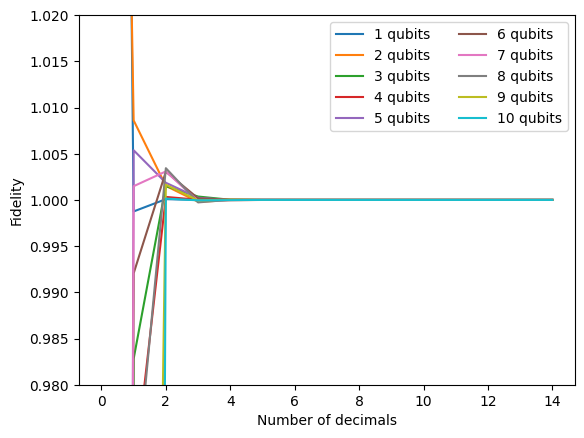

In [6]:
for num_qubit in range(1, num_qubits):
    print(fidelitiess[num_qubit, :].shape)
    plt.plot(range(0, num_decimals ), fidelitiess[num_qubit, :], label=f'{num_qubit} qubits')
plt.xlabel('Number of decimals')
plt.ylabel('Fidelity')
plt.ylim(0.98, 1.02)
plt.legend(ncol = 2)
plt.show()